In [1]:
# 伪代码
## 创建k个点作为起始质心（随机选择）：
#### 当任意一个点的簇分配结果放生改变的时候：
###### 对数据集中的每个数据点：
######## 对每个质心：
########## 计算质心与数据点之间的距离
########## 将数据点分配到距其最近的簇
###### 对每一个簇：
########## 求出均值并将其更新为质心

In [2]:
import numpy as np
import random


In [3]:
# 计算距离
def cal_distance(a, b):
    return np.sum((a-b)**2)**0.5

In [4]:
# 计算簇的中心
def cal_cluster_center(cluster):
    return np.mean(cluster, axis=0)

In [5]:
# 数据，k，最大迭代次数
def kmeans(data, k, max_iter):
    
    # 生成index
    indexes = [i for i in range(len(data))]
    random.shuffle(indexes)
    centers = []
    
    # 选出k个中心点
    for i in range(k):
        r_idx = indexes[i]
        centers.append(data[r_idx])
    
    pre_centers = centers[:]
    
    iter_ = 0
    while iter_ < max_iter:
        
        cluster_dict = {}
        for x in data:
            dist_list = []
            for i, center in enumerate(centers):
                dist = cal_distance(x, center)
                dist_list.append((i, dist))
            
#             dist_list.sort(key=lambda x:x[1])
            min_idx, min_dist = min(dist_list, key=lambda x:x[1])
#             min_idx, min_dist = dist_list[0]
            
            # 将该样例加入该簇
            if min_idx not in cluster_dict:
                cluster_dict[min_idx] = []
            
            cluster_dict[min_idx].append(x)
            
        # 重新计算簇的中心
        for i in range(k):
            centers[i] = cal_cluster_center(cluster_dict[i])
        
        if np.allclose(centers, pre_centers):
            print(f"converage by iter:{iter_}")
            break
        
        pre_centers = centers[:]
        iter_ += 1
    
    return cluster_dict
            

In [6]:
data = np.random.randn(1000, 2)

In [7]:
cluster_dict = kmeans(data, 5, 1000)

converage by iter:22


In [8]:
cluster_dict.keys()

dict_keys([0, 4, 1, 3, 2])

In [9]:
color_dict = {
    0:"yellow",
    1:"green",
    2:"red",
    3:"blue",
    4:"pink"
}

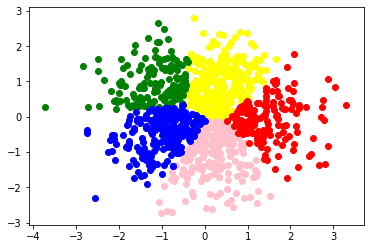

In [12]:
import matplotlib.pyplot as plt
for k,v in cluster_dict.items():
    v = np.array(v)
    plt.scatter(v[:,0], v[:,1], c=color_dict[k])

In [11]:
plt.show()

In [13]:
from sklearn.datasets import load_iris

In [15]:
iris = load_iris()

In [54]:
import torch
a = np.array([1,2,3,4], dtype=float)
b = np.array([3,3,4,5], dtype=float)

In [62]:
a = torch.tensor(a)
b = torch.tensor(b)

/raid/ypj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/raid/ypj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
